Note: through this exam you should only make use of numpy, matplotlib and pandas.

#Q1

0
[-1.31247206 -0.75024239] [0.85479773 1.17420677]


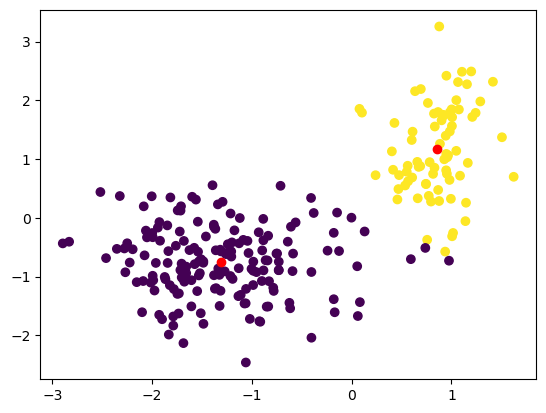

1
[-1.35717435 -0.75648152] [0.8410398 1.0921897]


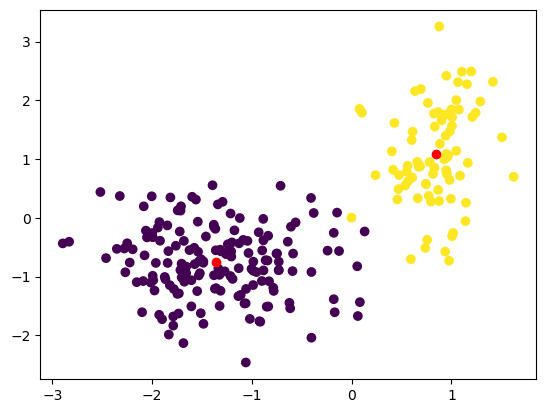

2
[-1.37333004 -0.7646729 ] [0.82057682 1.06412484]


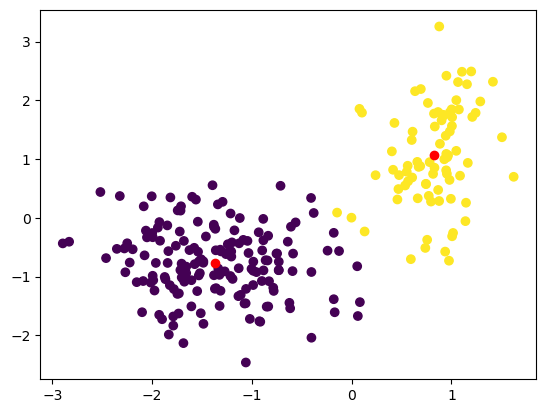

3
[-1.37915101 -0.77131269] [0.80596223 1.05547495]


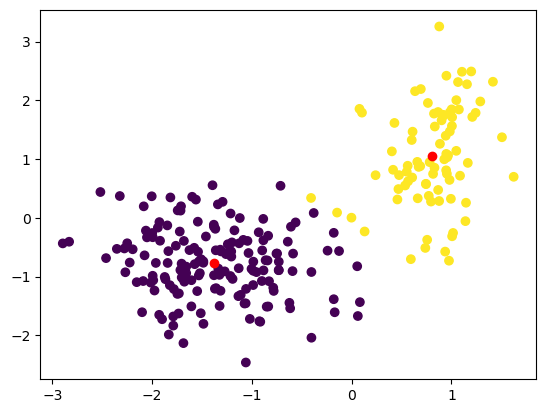

4
[-1.37915101 -0.77131269] [0.80596223 1.05547495]


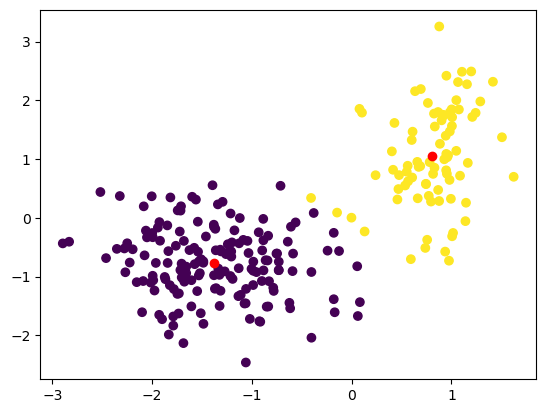

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#load in the data
df = pd.read_csv("http://pogo.software/me4ml/rjteh/d1.csv")
x1 = df['x1']
x2 = df['x2']

x1 = np.array(x1).reshape(-1, 1)
x2 = np.array(x2).reshape(-1, 1)

#Continue here...

mean1 = [np.array([-1, -1])]
mean2 = [np.array([2, 1])]

def L2norm(x1, x2, p):
    """
    x1: array of x1 points
    x2: array of x2 points
    p: point to find distance to

    returns array of distances of (x1, x2) points to p
    """

    x1dist = x1 - p[0]
    x2dist = x2 - p[1]
    sum = np.sum((x1dist**2 + x2dist**2), axis=1)
    return np.sqrt(sum)

for i in range(5):
    print(i)
    sum1 = L2norm(x1, x2, mean1[i])
    sum2 = L2norm(x1, x2, mean2[i])
    y = np.where(sum1 < sum2, 1, 2)

    x11 = x1[y==1]
    x12 = x1[y==2]
    x21 = x2[y==1]
    x22 = x2[y==2]

    mean1.append(np.array([x11.mean(), x21.mean()]))
    mean2.append(np.array([x12.mean(), x22.mean()]))
    print(mean1[-1], mean2[-1])

    plt.scatter(x1, x2, c=y)
    plt.scatter(mean1[-1][0], mean1[-1][1], c="red")
    plt.scatter(mean2[-1][0], mean2[-1][1], c="red")   
    plt.show()

[-1.31247206 -0.75024239] [0.85479773 1.17420677]


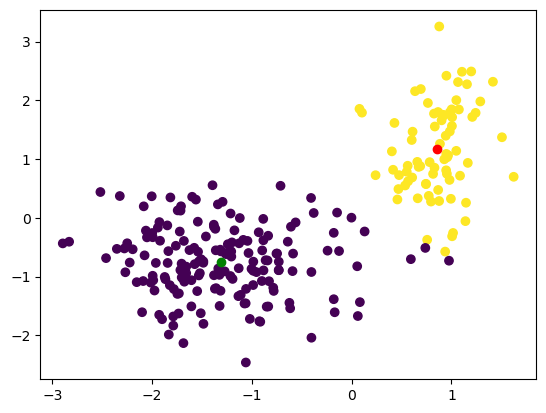

[-1.35717435 -0.75648152] [0.8410398 1.0921897]


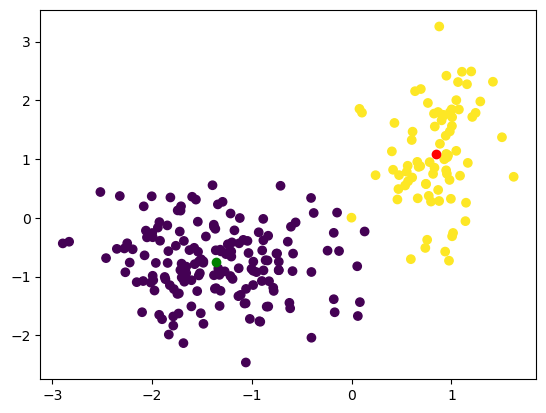

[-1.37333004 -0.7646729 ] [0.82057682 1.06412484]


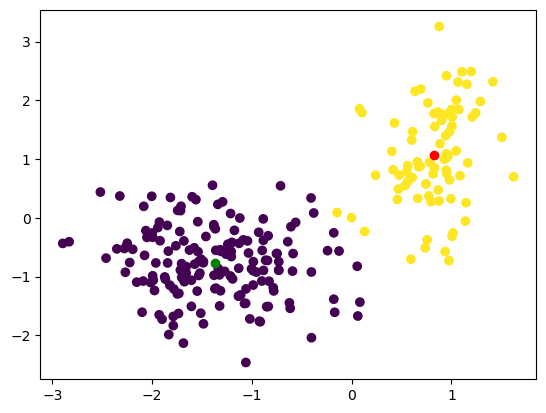

[-1.37915101 -0.77131269] [0.80596223 1.05547495]


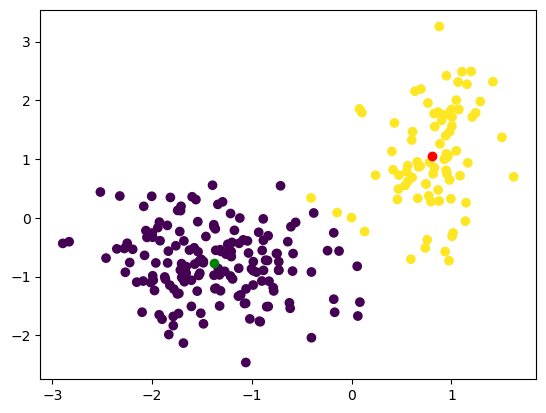

[-1.37915101 -0.77131269] [0.80596223 1.05547495]


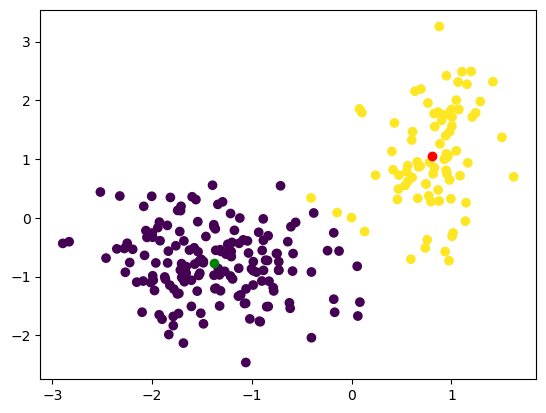

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#load in the data
df = pd.read_csv("http://pogo.software/me4ml/rjteh/d1.csv")
x1 = df['x1']
x2 = df['x2']

x1 = np.array(x1)
x2 = np.array(x2)

#Continue here...

mean1 = np.array([-1, -1])
mean2 = np.array([2, 1])

def L2norm(x1, x2, p):
    """
    x1: array of x1 points
    x2: array of x2 points
    p: point to find distance to

    returns array of distances of (x1, x2) points to p
    """

    x1dist = x1 - p[0]
    x2dist = x2 - p[1]
    sum = x1dist**2 + x2dist**2
    return np.sqrt(sum)

for _ in range(5):
    sum1 = L2norm(x1, x2, mean1)
    sum2 = L2norm(x1, x2, mean2)
    y = np.where(sum1 < sum2, 1, 2)
    x11 = x1[y==1]
    x12 = x1[y==2]
    x21 = x2[y==1]
    x22 = x2[y==2]

    mean1 = np.array([x11.mean(), x21.mean()])
    mean2 = np.array([x12.mean(), x22.mean()])
    print(mean1, mean2)

    plt.scatter(x1, x2, c=y)
    plt.scatter(mean1[0], mean1[1], c="green")
    plt.scatter(mean2[0], mean2[1], c="red")   
    plt.show()

#Q2

In [43]:
#This function may be useful to define the sampling grid for this question
def gen_sample_grid(npx=200, npy=200, limit=1):
  x1line = np.linspace(-limit, limit, npx)
  x2line = np.linspace(-limit, limit, npy)
  x1grid, x2grid = np.meshgrid(x1line, x2line)
  Xgrid = np.array([x1grid, x2grid]).reshape([2,npx*npy]).T
  return Xgrid,x1line,x2line

#this function may be useful to calculate the probability density function for a given set of means and covariance
def prob_density_2d(test_vals=np.array([[0], [0]]), mean1=0, mean2=0, covar_mat=np.array([[1, 0],[0, 1]]) ):
  #test_vals is an m x 2 numpy array containing all the values at which to perform the calculation
  #mean1, mean2 are the means in dimensions 1 and 2 respectively
  #covar_mat is a 2 x 2 covariance matrix
  #returns probability density values for each of the m values
  return 1 / (2 * np.pi * np.sqrt(np.linalg.det(covar_mat))) * np.exp(
    -1 / 2 * (np.matmul((test_vals-np.array((mean1,mean2)).T), np.linalg.inv(covar_mat)) 
    * (test_vals-np.array((mean1,mean2)).T)).sum(-1))

df = pd.read_csv("http://pogo.software/me4ml/rjteh/d2.csv")
x1 = df['x1']
x2 = df['x2']
clTrue = df['y']

#Continue 2(a) and 2(b) here...

x1 = np.array(x1)
x2 = np.array(x2)
y = np.array(clTrue)

x11_mean = x1[y==1].mean()
x12_mean = x1[y==2].mean()
x21_mean = x2[y==1].mean()
x22_mean = x2[y==2].mean()

c1_mean = np.array([x11_mean, x21_mean])
c2_mean = np.array([x12_mean, x22_mean])

cov1 = np.array([[x1[y==1].var(), 0],
                 [0, x2[y==1].var()]])

cov2 = np.array([[x1[y==2].var(), 0],
                 [0, x2[y==2].var()]])

print(c1_mean, c2_mean)
print(cov1,"\n", cov2)

[-1.34920307 -0.75202036] [0.85157853 1.10581811]
[[0.36348015 0.        ]
 [0.         0.35494227]] 
 [[0.07902776 0.        ]
 [0.         0.67727456]]


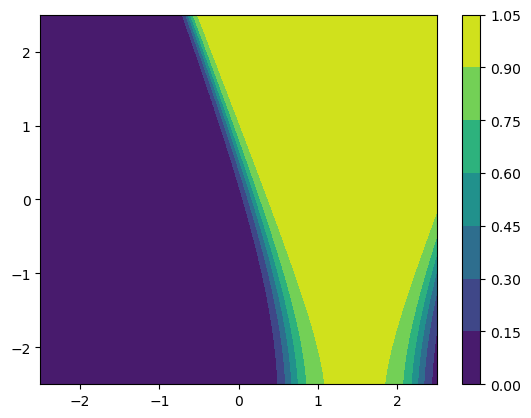

In [49]:
Xgrid, x1line, x2line = gen_sample_grid(200, 200, 2.5)

# find p(w|x) = p(x|w) * p(w) / p(x)

px_w1 = prob_density_2d(Xgrid, x11_mean, x21_mean, cov1)
px_w2 = prob_density_2d(Xgrid, x12_mean, x22_mean, cov2)

pw1 = len(x1[y==1]) / len(x1)
pw2 = len(x1[y==2]) / len(x1)

px = px_w1 * pw1 + px_w2 * pw2

pw1_x = (px_w1 * pw1) / px
pw2_x = (px_w2 * pw2) / px

decision = np.where(pw2_x > pw1_x, 2, 1).reshape(len(x1line), len(x2line))

plt.contourf(x1line, x2line, pw2_x.reshape(len(x1line), len(x2line)))
plt.colorbar()
plt.show()


#Q2 (c)

Answer here...

#Q2 (d)

Answer here...

#Q3

In [ ]:
df = pd.read_csv("http://pogo.software/me4ml/rjteh/d3.csv")
x = df['x']
y = df['y']

#Continue here...

#Q4 (a)

In [ ]:
#Continue here... 
#or write out as a text field if you wish.

#Q4 (b)

Answer here...